<p style="color:white; background:#07D; padding:12px; font-size:20px; font-style:italic; text-align:center">
<span style="width:49%; display:inline-block; text-align:left">Christophe Schlick</span>
<span style="width:49%; display:inline-block; text-align:right">schlick[at]u-bordeaux.fr</span>
<span style="font-size:40px; font-style:normal"><b>GENERATION D'IMAGES</b></span><br>
<span style="width:49%; display:inline-block; text-align:left">Version 2024-02</span>
<span style="width:49%; display:inline-block; text-align:right">Licence CC-BY-NC-ND</span></p>

L'objectif de cette feuille d'exercices est d'illustrer le principe de ***génération d'images par algorithmes***. L'ensemble des exercices vont mettre en oeuvre les fonctionnalités fournies par le package **`numpy`**, basées sur l'utilisation du conteneur **`array`** et des fonctions universelles pour manipuler les données stockées dans ce conteneur. Avant de commencer cette feuille d'exercices, il est donc fortement recommandé de lire le notebook **04-Numpy.ipynb** qui contient les éléments de cours correspondants.

> **Remarque importante :** Pour bénéficier du gain de vitesse fourni par le mécanisme de **vectorisation** qu'offrent les fonctions universelles, il est primordial de raisonner uniquement en manipulations globales des vecteurs et des matrices, et ceci pour l'ensemble des traitements à effectuer. Par conséquent ***aucune boucle **`for`** ou **`while`** ne devra être utilisée dans aucun des exercices de cette feuille !***

Le package **`numpy`** permet de créer des matrices de dimension quelconque, dont les éléments doivent tous être de même type. Mais dans le cadre de l'imagerie numérique, ***on va exclusivement utiliser 5 formes de matrices*** :

- Matrice MxN de booléens = **image binaire** (chaque pixel est défini par un booléen)
- Matrice MxN de réels = **image monochrome à valeurs continues** (chaque pixel est défini par un réel)
- Matrice MxN d'entiers = **image monochrome à valeurs discrètes** (chaque pixel est défini par un entier)
- Matrice MxNx3 de réels = **image polychrome à valeurs continues** (chaque pixel est défini par trois réels)
- Matrice MxNx3 d'entiers = **image polychrome à valeurs discrètes** (chaque pixel est défini par trois entiers)

---
Pour simplifier la vérification du code à écrire dans les exercices, on fournit une fonction **`view`** qui permet d'afficher une matrice **`numpy`** sous la forme d'une image insérée dans le notebook, à condition qu'elle utilise l'une des 5 formes définies ci-dessus. Voici quelques exemple de mise en oeuvre :

In [1]:
import numpy as np # import du package 'numpy' avec alias 'np'
from SRC.tools import show, view # import de deux fonctions du module 'tools'
import warnings; warnings.filterwarnings('ignore') # suppression des 'warning' de l'interpréteur

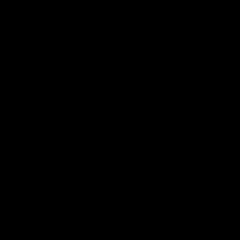

img.shape ➤ (240, 240)
img.size ➤ 57600
img.dtype ➤ float64
img.nbytes ➤ 460800

img[0,0] ➤ 0.0
img[0,:5] ➤ [0. 0. 0. 0. 0.]
img[-1,::20] ➤ [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [2]:
### Tester les différentes versions en enlevant successivement le '#' devant les lignes de type : #img = ...

img = np.zeros((240, 240)) # image monochrome noire (valeurs réelles pour les pixels)
#img = np.ones((240, 240)) # image monochrome blanche (valeurs réelles pour les pixels)
#img = np.full((240, 240), False) # image binaire noire (valeurs booléennes pour les pixels)
#img = np.full((240, 240), 0) # image monochrome noire (valeurs entières pour les pixels)
#img = np.full((240, 240), 0.0) # image monochrome noire (valeurs réelles pour les pixels)
#img = np.full((240, 240, 3), [0,0,0]) # image polychrome noire (valeurs entières pour les pixels)
#img = np.full((240, 240, 3), [1,0,0]) # image polychrome rouge (valeurs entières pour les pixels)
#img = np.full((240, 240, 3), [1,0.5,0]) # image polychrome orange (valeurs réelles pour les pixels)
#img = np.full((240, 240, 3), [255,0,0]) # image polychrome rouge (valeurs entières pour les pixels)

view(img) # affichage de la matrice sous forme d'image
show("img.shape; img.size; img.dtype; img.nbytes;") # affichage des attributs de la matrice
show("img[0,0]; img[0,:5]; img[-1,::20]") # affichage de pixels ou tranches de pixels

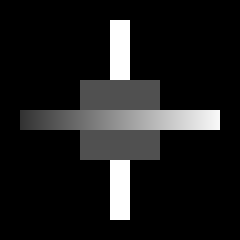

In [3]:
img = np.full((240, 240), 0) # image monochrome noire
img[20:220, 110:130] = 255 # ajout d'une bande blanche verticale
img[80:160, 80:160] = 80 # ajout d'un carré gris foncé
img[110:130, 20:220] = range(50,250) # ajout d'une bande horizontale avec dégradé de gris
view(img) # affichage de la matrice sous forme d'image

<h2 style="padding:16px; color:white; background:#07D">Exercice A1 - Génération d'aplats rectangulaires [grids]</h2>

Ecrire les instructions Python permettant de générer les 12 images de la figure ci-dessous. Chaque image individuelle devra avoir une taille de 240 sur 240. Vous aurez besoin des fonctions suivantes fournies par le package **`numpy`** (à vous de trouver leur rôle et ceux de leurs paramètres) :

- **`np.indices(size)`**
- **`np.repeat(array, repeats, [axis=n])`**
- **`np.min(array_or_tuple_of_arrays, [axis=n])`**
- **`np.max(array_or_tuple_of_arrays, [axis=n])`**
- **`np.random.randint(low, high, size)`**
- **`np.random.random(size)`**

![](IMG/grids.png 'grids.png')

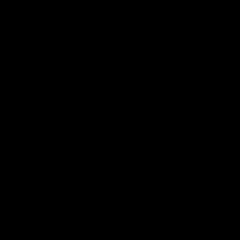

shape = (240, 240), type = int64, min = 0, max = 0


In [4]:
img = np.full((240, 240), 0) # image monochrome noire

# TODO

view(img); print(f"shape = {img.shape}, type = {img.dtype}, min = {img.min()}, max = {img.max()}")

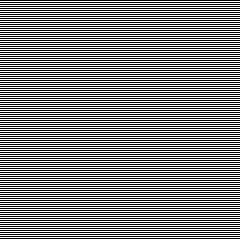

shape = (240, 240), type = int64, min = 0, max = 1


In [5]:
# Tester les différentes versions en enlevant successivement le '#' devant les lignes de type : #img = ...

rows, cols = np.indices((240, 240)) # création des matrices d'indices pour une image 240x240

# En appliquant un 'modulo 2', les lignes paires deviennent noires (= 0) et les impaires blanches (= 1)
img = rows % 2 # horizontal stripes (épaisseur des lignes = 1 pixel)

# Pour augmenter l'épaisseur des lignes, on rajoute une division entière sur les indices de lignes
#img = rows//6 % 2 # horizontal stripes (épaisseur des lignes = 6 pixels)
#img = cols//6 % 2 # vertical stripes (épaisseur des lignes = 6 pixels)
#img = (rows + cols) // 6 % 2 # diagonal stripes (épaisseur des lignes = 6/√2 pixels)
#img = (rows + cols) / (2 ** 0.5) // 6 % 2 # diagonal stripes (épaisseur des lignes = 6 pixels)

# Pour l'échiquier, le 'modulo 2' s'applique à la somme des indices de lignes et de colonnes
#img = (rows + cols) % 2 # chessboard (taille des cases = 1 pixel)
#img = (rows//30 + cols//30) % 2 # chessboard (taille des cases = 30x30 pixels)

# Pour les boîtes imbriquées, on calcule la distance minimale de chaque pixel aux bordures N,E,S,W
#img = np.min((rows, cols, 239-rows, 239-cols), axis=0) % 2 # boxes (largeur = 1 pixel)
#img = np.min((rows, cols, 239-rows, 239-cols), axis=0) // 16 % 2 # boxes (largeur = 16 pixels)
#img = np.min((rows//16, cols//16, 14-rows//16, 14-cols//16), axis=0) % 2 # version alternative

view(img); print(f"shape = {img.shape}, type = {img.dtype}, min = {img.min()}, max = {img.max()}")

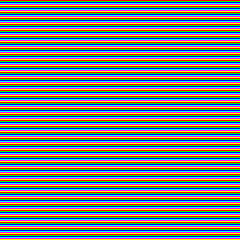

shape = (240, 240, 3), type = int64, min = 0, max = 1


In [6]:
# Tester les différentes versions en enlevant successivement le '#' devant les lignes de type : #img = ...

# On définit une palette de couleurs sous la forme d'une matrice à 2 dimensions (6 rows, 3 cols)
colors = np.array([[1,0,0], [0,1,0], [0,0,1], [0,1,1], [1,0,1], [1,1,0]]) # colormap = RGBCMY

# On utilise les exemples précédents en tant qu'indices dans cette palette de couleurs
img = colors[rows % 6] # colormap stripes (largeur = 1 pixel)
#img = colors[rows//6 % 6] # colormap stripes (largeur = 6 pixels)

#img = colors[(rows + cols) % 6] # colormap chessboard (taille des cases = 1 pixel)
#img = colors[(rows//30 + cols//30) % 6] # colormap chessboard (taille des cases = 30x30 pixels)

#img = colors[np.min((rows, cols, 239-rows, 239-cols), axis=0) % 6] # colormap boxes (1 pixel)
#img = colors[np.min((rows, cols, 239-rows, 239-cols), axis=0)//16 % 6] # colormap boxes (16 pixels)

view(img); print(f"shape = {img.shape}, type = {img.dtype}, min = {img.min()}, max = {img.max()}")

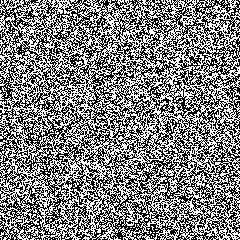

shape = (240, 240), type = int32, min = 0, max = 1


In [7]:
# Tester les différentes versions en enlevant successivement le '#' devant les lignes de type : #img = ...

# La fonction 'randint' crée une matrice de valeurs aléatoires entières dans l'intervalle [low, high[
# Lorsqu'il n'y a que 2 valeurs possibles pour les valeurs aléatoires, l'image résultante est appelée
# 'bruit binaire' (binary noise, en anglais) dans le domaine du traitement d'images
img = np.random.randint(0, 2, (240,240)) # binary pixel noise

# Pour obtenir des aplats de noirs ou blancs, on peut employer l'une des deux techniques suivantes :

# version 1 : on crée une matrice aléatoire 40x40 et on s'en sert de palette par blocs de 6x6
noise = np.random.randint(0, 2, (40,40)) # on crée une palette de 40x40 avec des valeurs binaires aléatoires
#img = noise[rows//6, cols//6] # chaque bloc de 6x6 utilise la même valeur aléatoire dans la palette

# version 2 : on crée une matrice aléatoire 40x40 et on répète chaque pixel 6x en horizontal et vertical
#img = noise.repeat(6, axis=0).repeat(6, axis=1) # binary tile noise

# La fonction 'random' crée une matrice de valeurs aléatoires réelles dans l'intervalle [0, 1[
# Lorsqu'il y a une infinité de valeurs possibles pour les valeurs aléatoires, l'image résultante est
# appelée 'bruit continu' (continuous noise ou grayscale noise, en anglais)
#img = np.random.random((240,240)) # grayscale pixel noise
#img = np.random.random((40,40)).repeat(6, axis=0).repeat(6, axis=1) # grayscale tile noise

# Pour obtenir les échiquiers bruités, il faut combiner l'image de l'échiquier et l'image de bruit. Pour
# cela il y a 2 approches possibles : soit par addition, soit par multiplication des valeurs des pixels
chess = (rows//30 + cols//30) % 2; noise = np.random.random((240,240)) # les 2 images de départ
#img = 0.6*chess + 0.4*noise # noisy chessboard (combinaison additive)
#img = chess * noise # noisy chessboard (combinaison multiplicative)

view(img); print(f"shape = {img.shape}, type = {img.dtype}, min = {img.min()}, max = {img.max()}")

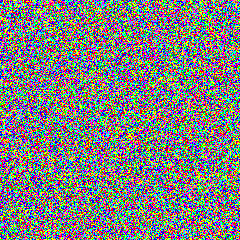

shape = (240, 240, 3), type = int64, min = 0, max = 1


In [8]:
# Tester les différentes versions en enlevant successivement le '#' devant les lignes de type : #img = ...

# Les valeurs aléatoires entières peuvent également être utilisées pour indexer une palette de couleurs
img = colors[np.random.randint(0, 6, (240,240))] # colormap pixel noise
#img = colors[np.random.randint(0, 6, (40,40)).repeat(6, axis=0).repeat(6, axis=1)] # colormap tile noise

# Ou alors, on peut directement générer des valeurs aléatoires indépendamment pour les canaux R, G et B
#img = np.random.random((240,240,3)) # color pixel noise
#img = np.random.random((40,40,3)).repeat(6,axis=0).repeat(6,axis=1) # color tile noise

# En annulant le canal R, on se limite à un bruit de couleurs dans la gamme des bleus-verts
#img = np.random.random((240,240,3)); img[:,:,0] = 0 # blue-green pixel noise

# La combinaison d'images polychromes est similaire à celle des images monochromes
colorchess = colors[(rows//30 + cols//30) % 6]; colornoise = np.random.random((240,240,3))
#img = 0.5*colorchess + 0.5*colornoise # noisy color chessboard (combinaison additive)
#img = colorchess * (0.2 + 0.8*colornoise) # noisy color chessboard (combinaison multiplicative)

view(img); print(f"shape = {img.shape}, type = {img.dtype}, min = {img.min()}, max = {img.max()}")

<h2 style="padding:16px; color:white; background:#07D">Exercice A2 - Génération de dégradés axiaux [ramps]</h2>

Ecrire les instructions Python permettant de générer les images de la figure ci-dessous. En plus de certaines des fonctions de l'exercice précédent, vous aurez également besoin des fonctions suivantes :

- **`np.linspace(start, stop, samples)`**
- **`np.tile(array, repeats)`**
- **`np.divmod(number_or_array, number_or_array)`**
- **`np.where(test, true_value, false_value)`**

![](IMG/ramps.png 'ramps.png')

In [9]:
# TODO
#view(img); print(f"shape = {img.shape}, type = {img.dtype}, min = {img.min()}, max = {img.max()}")

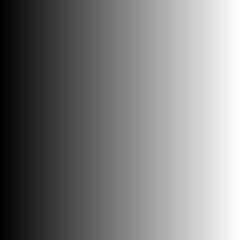

shape = (240, 240), type = int64, min = 0, max = 239


In [10]:
# Tester les différentes versions en enlevant successivement le '#' devant les lignes de type : #img = ...

# On peut générer un dégradé linéaire en utilisant directement la matrice des indices de lignes/colonnes
# comme on l'a fait dans l'exercice A1, mais cela possède l'inconvénient de faire dépendre les valeurs des
# pixels de la dimension de l'image (avec une image 240x240, on sera toujours entre 0 et 239)
img = cols # left-to-right horizontal ramp (valeurs des pixels comprises entre 0 et 239)
#img = rows # top-to-bottom vertical ramp (valeurs des pixels comprises entre 0 et 239)

view(img); print(f"shape = {img.shape}, type = {img.dtype}, min = {img.min()}, max = {img.max()}")

In [11]:
# Lorsqu'on manipule des dégradés, il est beaucoup plus intéressant de travailler avec des pixels à valeurs
# réelles, et faire en sorte de systématiquement normaliser ces valeurs dans l'intervalle [0,1[
# Comme nous le verrons sur des exemples, il est important de ne pas inclure la valeur 1 dans les valeurs
# autorisées pour garantir que tous les pixels auront une partie entière égale à 0. La bibliothèque 'numpy'
# fournit la fonction 'linspace' qui permet d'échantillonner de manière uniforme un échantillon [low,high]
# Comme la borne supérieure est incluse avec la fonction 'linspace', il donc faut spécifiquement interdire
# la valeur 1 pour générer un dégradé qui sera bien compris dans l'intervalle [0,1[
ramp = np.linspace(0, 0.9999999, 240) # solution 1 : on s'arrête explicitement à 0.9999999
#ramp = np.linspace(0, 1, 240, endpoint=False) # solution 2 : on enlève la valeur finale de l'intervalle
show("ramp.shape; ramp[:5]; ramp[-5:];") # affichage de quelques éléments du vecteur

# La fonction 'tile' (carreler) est une généralisation de la fonction 'repeat' qui permet de répéter
# une matrice complète et non pas simplement une valeur (ici, 240x en vertical et 1x en horizontal)
ramp = np.tile(ramp, (240, 1)) # linear ramp (matrix : 240 rows, 240 cols)
show("ramp.shape; ramp#") # affichage de quelques éléments de la matrice

ramp.shape ➤ (240,)
ramp[:5] ➤ [0.        0.0041841 0.0083682 0.0125523 0.0167364]
ramp[-5:] ➤ [0.9832635 0.9874476 0.9916317 0.9958158 0.9999999]

ramp.shape ➤ (240, 240)
ramp ➤
[[0.        0.0041841 0.0083682 ... 0.9916317 0.9958158 0.9999999]
 [0.        0.0041841 0.0083682 ... 0.9916317 0.9958158 0.9999999]
 [0.        0.0041841 0.0083682 ... 0.9916317 0.9958158 0.9999999]
 ...
 [0.        0.0041841 0.0083682 ... 0.9916317 0.9958158 0.9999999]
 [0.        0.0041841 0.0083682 ... 0.9916317 0.9958158 0.9999999]
 [0.        0.0041841 0.0083682 ... 0.9916317 0.9958158 0.9999999]]


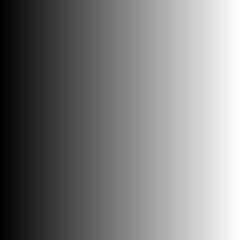

shape = (240, 240), type = float64, min = 0.0, max = 0.9999999


In [12]:
# Tester les différentes versions en enlevant successivement le '#' devant les lignes de type : #img = ...

# Une fois la matrice créée, on peut alors afficher directement le dégradé horizontal
img = ramp # left-to-right horizontal ramp

# ou inverser le sens du dégradé en inversant les indices de colonnes
#img = ramp[:,::-1] # right-to-left horizontal ramp
#img = np.fliplr(ramp) # version alternative avec la fonction 'fliplr' (flip left-right)

# ou alors transposer la matrice (opérateur .T) pour obtenir un dégradé vertical
#img = ramp.T # top-to-bottom vertical ramp

# ou encore combiner les 2 opérations en inversant les indices de lignes
#img = ramp.T[::-1,:] # bottom-to-top vertical ramp
#img = np.flipud(ramp.T) # version alternative avec la fonction 'flipud' (flip upside-down)

# Enfin, on peut obtenir des dégradés diagonaux, en faisant la moyenne entre 2 dégradés orthogonaux
#img = 0.5*ramp + 0.5*ramp.T # upper-left to bottom-right diagonal ramp
#img = 0.5*ramp[:,::-1] + 0.5*ramp.T # upper-right to bottom-left diagonal ramp

view(img); print(f"shape = {img.shape}, type = {img.dtype}, min = {img.min()}, max = {img.max()}")

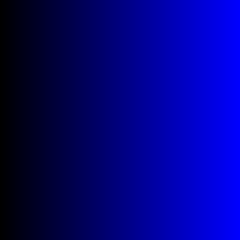

shape = (240, 240, 3), type = float64, min = 0.0, max = 0.9999999


In [13]:
# Tester les différentes versions en enlevant successivement le '#' devant les lignes de type : #img = ...

# Pour obtenir un dégradé coloré, il suffit de multiplier la matrice 'ramp' par une couleur
# mais pour cela, il faut rendre les matrices compatibles en rajoutant une troisième dimension
# note : la notation 'None' signifie "cette dimension existe, mais elle est vide"
img = colors[2] * ramp[:,:,None] # blue ramp
#img = colors[1] * ramp[:,:,None] # green ramp

# En utilisant le dégradé complémentaire (1 - ramp), on peut effectuer une interpolation entre 2 couleurs
#img = colors[1] * ramp[:,:,None] + colors[2] * (1 - ramp)[:,:,None] # blue-green ramp

view(img); print(f"shape = {img.shape}, type = {img.dtype}, min = {img.min()}, max = {img.max()}")

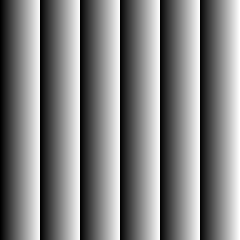

shape = (240, 240), type = float64, min = 0.0, max = 0.9999994000000001


In [14]:
# Tester les différentes versions en enlevant successivement le '#' devant les lignes de type : #img = ...

# La solution la plus flexible pour créer des motifs périodiques est d'utiliser l'opérateur 'modulo 1'
# (% 1, en Python) qui retourne la partie entière d'une valeur réelle. En multipliant la matrice du
# dégradé par 6 puis en prenant le modulo 1, on crée un dégradé périodique avec 6 périodes
pramp = 6 * ramp % 1 # pramp = periodic ramp (6 periods)
img = pramp # horizontal periodic ramp (6 periods)
#img = pramp.T # vertical periodic ramp (6 periods)

# Par défaut, le dégradé obtenu par la fonction 'linspace' est linéaire (comme son nom l'indique)
# un moyen classique pour modifier cela est d'appliquer une exponentiation au résultat
#img = pramp ** 0.4 # on applique un éclaircissement (exponentiation avec puissance < 1)
#img = pramp ** 2.5 # on applique un assombrissement (exponentiation avec puissance > 1)

# Pour avoir une couleur différente par période, on va créer une fonction en escalier ('step function',
# en anglais) pour numéroter les cycles du dégradé périodique. Pour cela, on utilise l'opérateur
# 'quotient 1' (// 1, en Python) qui retourne la partie entière d'une valeur réelle. En multipliant
# la matrice par 6 puis en prenant le quotient 1, on crée une fonction en escalier avec 6 marches
sramp = 6 * ramp // 1 # sramp = step ramp (6 steps)
#img = sramp # on obtient une série de 6 bandes verticales avec les valeurs 0, 1, 2, 3, 4, 5

# Même si la matrice 'sramp' ne contient que des valeurs entières, elle est stockée comme matrice de réels
# donc pour pouvoir s'en servir comme indice dans la palette de couleurs, il faut la convertir en entier
# pour obtenir des indices permettant de piocher les différentes couleurs présentes dans la palette.
# Avec 'numpy', la conversion d'une matrice en entiers s'effectue avec la fonction 'astype(int)'
#img = colors[sramp.astype(int)] # chaque bande verticale est ainsi associée à l'une des 6 couleurs

# Comme on utilise à la fois le quotient (6*ramp // 1) et le reste (6*ramp % 1) dans les opérations
# précédentes, une solution plus efficace consiste à mettre en oeuvre la fonction 'divmod' qui permet
# de calculer simultanément le quotient et le reste d'une division entière pour toute une matrice :
sramp, pramp = np.divmod(6 * ramp, 1) # le quotient est stocké dans 'sramp' et le reste dans 'pramp'
#img = colors[sramp.astype(int)] * pramp[:,:,None] ** 0.4 # on obtient une couleur par bande verticalee

# Pour obtenir un dégradé diagonal périodique, il suffit de "périodiser" un dégradé diagonal
dramp = 0.5*ramp + 0.5*ramp.T # dramp = diagonal ramp (cf. cellule précédente)
dpramp = 6 * dramp % 1 # dpramp = diagonal periodic ramp (6 periods)
#img = dpramp # on obtient une série de 6 dégradés diagonaux

# Comme précédemment, la fonction 'divmod' va nous permettre de colorier les bandes diagonales
dsramp, dpramp = np.divmod(6 * dramp, 1) # le quotient dans 'dsramp' et le reste dans 'dpramp'
#img = dsramp # on obtient une série de 6 bandes diagonales avec les valeurs 0, 1, 2, 3, 4, 5

# Pour obtenir le dégradé coloré final, il suffit de multiplier les couleurs par le dégradé périodique
#img = colors[dsramp.astype(int)] * dpramp[:,:,None] ** 0.4 # on éclaircit le dégradé après colorisation

view(img); print(f"shape = {img.shape}, type = {img.dtype}, min = {img.min()}, max = {img.max()}")

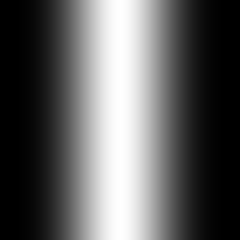

shape = (240, 240), type = float64, min = 0.0, max = 0.9998952605847359


In [15]:
# Tester les différentes versions en enlevant successivement le '#' devant les lignes de type : #img = ...

# Pour créer un dégradé symétrique, on va utiliser la fonction 'where' qui permet de
# traiter différemment les zones d'une matrice, en fonction d'une expression booléenne

# On construit une fonction 'mirror' qui permet de "symétriser" toute donnée dans l'intervalle [0,1]
# avec une fonction par morceaux qui vaut '2t' sur [0,0.5] et '2-2t' sur [0.5,1]
mirror = lambda t: np.where(t < 0.5, 2*t, 2-2*t)

# On peut alors appliquer cette fonction 'mirror' directement au dégradé 'ramp' généré précédemment
sramp = mirror(ramp) # symmetric ramp
img = sramp  # horizontal symmetric ramp
#img = sramp.T # vertical symmetric ramp

# Pour donner l'illusion d'un tuyau cylindrique, il faut modifier un peu le dégradé trop "anguleux",
# pour cela, une technique très classique est d'appliquer une fonction de lissage au résultat brut.
# Parmi les fonctions de lissage usuelles, on trouve la fonction 'smooth' de Hermite, polynôme cubique
# qui possède les propriétés suivantes : f(0) = 0, f'(0) = 0, f(1) = 1, f'(1) = 0, f(1-t) = 1-f(t)
smooth = lambda t: t*t*(3-2*t) # Hermite cubic function (a.k.a smooth step function)

#img = smooth(sramp) # en appliquant la fonction 'smooth', on obtient bien l'illusion d'un cylindre
#img = smooth(sramp) ** 0.4 # en appliquant un éclaircissement, on augmente le diamètre apparent du cylindre
#img = smooth(sramp) ** 8 # à l'inverse, un assombrissement diminue le diamètre apparent du cylindre

# Pour simplifier la mise en oeuvre, on crée une fonction qui applique séquentiellement les 3 opérateurs
tube = lambda t,p=1: smooth(mirror(t)) ** p # on symétrise, on lisse et on éclaircit/assombrit

tramp = tube(ramp, 2) # le dégradé linéraire horizontal est transformé en tube vertical
img = tramp

view(img); print(f"shape = {img.shape}, type = {img.dtype}, min = {img.min()}, max = {img.max()}")

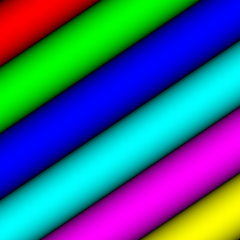

shape = (240, 240, 3), type = float64, min = 0.0, max = 0.9999994757187051


In [16]:
# Pour obtenir un dégradé périodique symétrique, on applique 'mirror' à un dégradé périodique
psramp = mirror(3 * ramp % 1) # psramp = periodic symmetric ramp (3 ramps)
img = psramp # pour chaque ligne, les variations suivent une fonction en dents de scie (avec 3 dents)

# Attention : si on applique les opérateurs dans l'ordre inverse, le résultat n'est pas celui souhaité
#img = 3 * mirror(ramp) % 1 # 3 périodes sur la moitié gauche puis symétrisation

# La fonction 'tube' appliquée à un dégradé périodique symétrique permet de créer des cylindres parallèles
#img = tube(3 * ramp % 1) # avec un dégradé périodique horizontal, on crée des cylindres verticaux
#img = tube(6 * dramp % 1, 0.25) # avec un dégradé périodique diagonal, on crée des cylindres diagonaux

# Dans la dernière image de la colonne 2, les cylindres ne sont pas tout à fait diagonaux, mais inclinés
# avec un angle inférieur à 45°, cela s'obtient en faisant une moyenne avec des coefficients de pondération
# différents entre le dégradé vertical et le dégradé horizontal, au lieu d'utiliser une moyenne classique :
slramp = 0.4*ramp + 0.6*ramp.T # dégradé incliné (en anglais, 'slanted ramp')
#img = tube(6 * slramp % 1, 0.25) # avec un dégradé incliné, on crée des cylindres inclinés

# Pour coloriser ces dégradés, on utilise le même processus que dans la cellule précédente
slsramp, slpramp = np.divmod(6 * slramp, 1) # le quotient dans 'slsramp' et le reste dans 'slpramp'
sltramp = tube(slpramp, 0.25) # on transforme les dégradés en cylindres avec la fonction 'tube'
img = colors[slsramp.astype(int)] * sltramp[:,:,None] # et on colorie les cylindres avec la palette 'colors'

view(img); print(f"shape = {img.shape}, type = {img.dtype}, min = {img.min()}, max = {img.max()}")

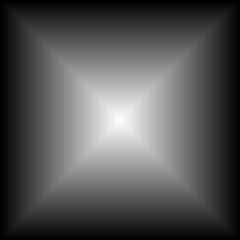

shape = (240, 240), type = float64, min = 0.0, max = 0.9958159999999998


In [17]:
# Tester les différentes versions en enlevant successivement le '#' devant les lignes de type : #img = ...

# On peut évidemment créer de nombreux autres opérateurs pour modifier des images, par exemple :
minT = lambda t: np.min((t,t.T), axis=0) # minimum entre une matrice et sa transposée
maxT = lambda t: np.max((t,t.T), axis=0) # maximum entre une matrice et sa transposée

# Si on applique ces opérateurs aux dégradés crées précédemment, on obtient des effets intéressants :
bramp = minT(sramp) # dégradé en forme de boîte pyramidale (bramp = box ramp)
img = bramp
rbramp = minT(tramp) # dégradé en forme de boîte arrondie (rbramp = rounded box ramp)
#img = rbramp
cramp = maxT(sramp) # dégradé en forme de croix (cramp = cross ramp)
#img = cramp
rcramp = maxT(tramp) # dégradé en forme de croix arrondie (rcramp = rounded cross ramp)
#img = rcramp

# Tous ces dégradés peuvent être rendus périodiques, toujours en utilisant l'opérateur 'modulo'
#img = tube(5*bramp % 1, 2) # on "périodise" un dégradé en forme de boîte
#img = tube(2.5*cramp % 1, 0.25) # on "périodise" un dégradé en forme de croix

# Et enfin, pour créer des dégradés colorés, on va à nouveau utiliser la fonction 'divmod'
sbramp, pbramp = np.divmod(7.5*bramp, 1) # le quotient dans 'sbramp' et le reste dans 'pbramp'
sbramp, pbramp = sbramp % 6, tube(pbramp, 0.25) # on ramène les indices au nombre de couleurs de la palette
#img = colors[sbramp.astype(int)] * pbramp[:,:,None] # on colorie chaque tube concentrique selon son indice

view(img); print(f"shape = {img.shape}, type = {img.dtype}, min = {img.min()}, max = {img.max()}")

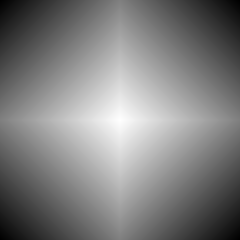

shape = (240, 240), type = float64, min = 0.0, max = 0.9958159999999998


In [18]:
### Tester les différentes versions en enlevant successivement le '#' devant les lignes de type : #img = ...

# On peut encore complexifier les dégradés précédents (bramp, cramp) en les combinant entre eux :
img = 0.5*cramp + 0.5*bramp # combinaison additive entre cross ramp et box ramp
#img = 0.5*smooth(cramp) + 0.5*smooth(bramp) # idem avec les versions lissées

#img = cramp - bramp # combinaison soustractive entre cross ramp et box ramp
#img = (smooth(cramp) - smooth(bramp)) ** 0.5 # idem avec les versions lissées et un éclaircissement

#img = cramp * bramp # combinaison multiplicative entre cross ramp et pyramid ramp
#img = (smooth(cramp) * smooth(bramp)) ** 0.25 # idem avec les versions lissées et un éclaircissement

# Pour créer la dernière image, il faut combiner la plupart des opérateurs vus précédemment :
tubes = tube(8*ramp % 1, 0.25) # on commence par créer un ensemble de 8 cylindres verticaux
#img = colorchess * tubes[:,:,None] # en multipliant par 'colorchess', on va colorier des morceaux de tubes
#img = colorchess * tubes.T[:,:,None] # on peut évidemment faire la mêne chose avec des cylindres horizontaux

# Pour obtenir le résultat souhaité, il faut que chaque case génère un dégradé dans les 2 directions
# donc, on peut se dire qu'il suffit de prendre le min des dégradés horizontaux et verticaux:
#img = colorchess * minT(tubes)[:,:,None] # ... mais ce n'est pas tout à fait ça

# La solution consiste à faire une combinaison additive du min et du max des deux dégradés
grid = 0.5*minT(tubes) + 0.5*maxT(tubes) # on fait la moyenne du min et du max
#img = colorchess * grid[:,:,None] # et on colorie les cases avec 'colorchess'

# Autre solution assez proche : faire une combinaison multiplicative et éclaircir le résultat obtenu
grid = (minT(tubes) * maxT(tubes)) ** 0.5 # on multiplie le min et le max, puis on éclaircit
#img = colorchess * grid[:,:,None] # et on colorie les cases avec 'colorchess'

view(img); print(f"shape = {img.shape}, type = {img.dtype}, min = {img.min()}, max = {img.max()}")

<h2 style="padding:16px; color:white; background:#07D">Exercice A3 - Génération de dégradés circulaires [spots]</h2>

Ecrire les instructions Python permettant de générer les images de la figure ci-dessous. En plus de certaines des fonctions de l'exercice précédent, vous aurez également besoin des fonctions suivantes :

- **`np.meshgrid(samples_for_x, samples_for_y)`**
- **`np.clip(array, lower_bound, upper_bound)`**
- **`np.hstack(tuple_of_arrays)`** ou **`np.vstack(tuple_of_arrays)`**
- **`np.sin(array)`** ou **`np.cos(array)`** ou **`np.atan2(y, x)`**

![](IMG/spots.png 'spots.png')

In [19]:
# TODO
#view(img); print(f"shape = {img.shape}, type = {img.dtype}, min = {img.min()}, max = {img.max()}")

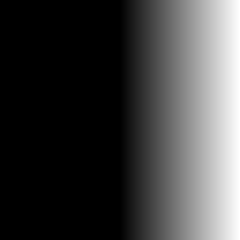

shape = (240, 240), type = float64, min = -1.0, max = 1.0


In [20]:
# Tester les différentes versions en enlevant successivement le '#' devant les lignes de type : #img = ...

# Un dégradé circulaire peut s'obtenir en calculant, pour chaque pixel, la distance au centre de l'image.
# Pour simplifier les calculs, on va utiliser un repère où l'origine (0,0) se place au centre de l'image,
# et où les coordonnées 'x' et 'y' se limitent à l'intervalle [-1,1]

# la fonction 'meshgrid' est très similaire à la fonction 'indices', sauf qu'au lieu de renvoyer les
# indices de lignes et de colonnes pour chaque case d'une matrice, elle renvoit la valeur courante de
# deux vecteurs passés en arguments, correspondant à l'échantillonnage des coordonnées 'x' et 'y'.
# Dans notre cas, on va faire varier linéairement les coordonnées 'x' et 'y' dans l'intervalle [-1,1]
t = np.linspace(-1, 1, 240); x, y = np.meshgrid(t, t)

img = x # les valeurs sont négatives sur la moitié gauche de l'image (donc pixels de couleur noire)
#img = 1+x # idem à 'ramp' sauf que l'intervalle de variation est [0,2] et non [0,1]
#img = y # les valeurs sont négatives sur la moitié supérieure de l'image (donc pixel de couleur noire)
#img = 1+y # idem à 'ramp.T' sauf que l'intervalle de variation est [0,2] et non [0,1]

#img = x*x + y*y # carré de la distance euclidienne au centre de l'image
#img = (x*x + y*y) ** 0.5 # distance euclidienne au centre de l'image
#img = np.clip(x*x + y*y, 0, 1) ** 0.5 # distance euclidienne tronquée à l'intervalle [0,1]

# Enfin, on inverse le sens du dégradé, pour avoir une valeur 1 au centre, 0 à la périphérie
spot = 1 - np.clip(x*x + y*y, 0, 1) ** 0.5 # basic linear spot
#img = spot

# Comme pour la fonction 'tube', on va créer une fonction 'ball' qui permet de donner l'illusion d'une
# sphère, en rajoutant du lissage et de l'éclaircissement/assombrissement sur le dégradé généré
ball = lambda x,y,p=1: smooth(1 - np.clip(x*x + y*y, 0, 1) ** 0.5) ** p # lissage et éclairage
#img = ball(x, y, 0.4)

view(img); print(f"shape = {img.shape}, type = {img.dtype}, min = {img.min()}, max = {img.max()}")

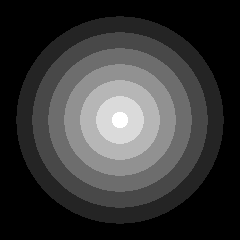

shape = (240, 240), type = float64, min = 0.0, max = 7.0


In [21]:
# Tester les différentes versions en enlevant successivement le '#' devant les lignes de type : #img = ...

# Pour créer une fonction en escalier, on utilise à nouveau l'opérateur 'quotient 1'
sspot = 7.5*spot // 1 # sspot = step spot
img = sspot # on obtient 8 couronnes concentriques, mais la plus externe est invisible
#print(np.unique(img)) # affichage des valeurs uniques des pixels de l'image : 0 1 2 3 4 5 6 7

# Par forcer la visibilité de l'ensemble des 8 couronnes, on augmente l'écart entre le noir (zone
# à l'extérieur du disque) et le gris le plus foncé (zone de la couronne la plus externe)
#img = sspot + 3*(spot > 0) # les pixels à l'intérieur du disque sont incrémentés de 3
#print(np.unique(img)) # affichage des valeurs uniques pour les pixels de l'image : 0 3 4 5 6 7 8 9 10

# Pour affecter une couleur à chaque disque, on procède à nouveau à l'aide de notre palette de couleurs
sspot = sspot % 6 # on utilise un 'modulo' pour créer un cycle sur les 6 couleurs de la palette
#img = colors[sspot.astype(int)] # on utilise le dégradé comme indice dans la palette de couleurs

# Pour obtenir une couleur noire dans la zone extérieure, il faut enchainer trois étapes :
newcolors = np.vstack((colors, [[0,0,0]])) # on rajoute la couleur noire en fin de palette = RGBCMYK
sspot -= (spot == 0) # on force l'indice de la zone extérieure à -1 (= fin de palette)
colorspot = newcolors[sspot.astype(int)] # et on utilise cet indice pour piocher dans la nouvelle palette
#img = colorspot # on obtient bien les 8 couronnes avec alternance périodique des couleurs

# Pour obtenir l'image souhaitée, il faut rajouter un 'grayscale pixel noise' comme dans l'exercice A1
graynoise = 0.5 + 0.5*np.random.random((240,240)) # on crée un bruit monochrome
#img = colorspot * graynoise[:,:,None] # on ajoute le bruit en multiplicatif

view(img); print(f"shape = {img.shape}, type = {img.dtype}, min = {img.min()}, max = {img.max()}")

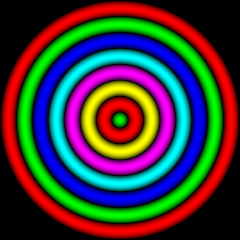

shape = (240, 240, 3), type = float64, min = 0.0, max = 0.9999996323280875


In [22]:
### Tester les différentes versions en enlevant successivement le '#' devant les lignes de type : #img = ...

# Pour obtenir le dégradé en anneau, il suffit de réutiliser les fonctions 'mirror' ou 'tube'
img = mirror(spot) # dégradé en anneau avec variation en dent de scie
#img = tube(spot) # en lissant le dégradé, on peut obtenir un aspect visuel de tore
#img = tube(spot, 0.2) # en éclairant, on augmente le diamètre apparent du tore
#img = tube(spot, 5) # en assombrissant, on diminue le diamètre apparent du tore

# Pour obtenir des tores concentriques, on utilise l'opérateur 'modulo 1' comme précédemment
ptorus = tube(7.5*spot % 1, 0.4) # ptorus = periodic torus
img = ptorus # on obtient bien 8 tores concentriques

# Et enfin, on effectue une combinaison multiplicative avec l'image 'colorspot' (cf. cellule précédente)
img = colorspot * ptorus[:,:,None] # et on pioche les couleurs dans la palette

view(img); print(f"shape = {img.shape}, type = {img.dtype}, min = {img.min()}, max = {img.max()}")

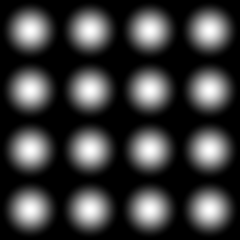

shape = (240, 240), type = float64, min = 0.0, max = 0.999895374185435


In [23]:
# Tester les différentes versions en enlevant successivement le '#' devant les lignes de type : #img = ...

# Pour obtenir une périodicité spatiale pour un dégradé circulaire, c'est à nouveau l'opérateur 'modulo'
# qu'il faut utiliser, mais faisant attention à garder les coordonnées x et y dans l'intervalle ]-1,1[
# Donc plutôt que de faire "t % 1" pour avoir une valeur dans [0,1[, on utilise "t % 2 - 1"
xx, yy = 4*x % 2 - 1, 4*y % 2 - 1 # on génère 4 répétitions en x et 4 répétitions en y
img = ball(xx, yy) # on obtient un ensemble de 16 dégradés circulaires, réparties dans une matrice 4x4
#img = ball(xx, yy, 0.4) # on éclaircit pour donner l'impression de sphères

# Pour simplifier la mise en oeuvre, on crée une fonction pour périodiser les dégradés circulaires
balls = lambda x,y,p=1: ball(x % 2 - 1, y % 2 - 1, p) # on périodise avant d'appeler 'ball'

#img = balls(12*x, 12*y, 2) # on contrôle indépendamment la période et le dégradé
#img = balls(3*x, 2*y, 0.25) # la période peut être différente sur les 2 axes

# On peut appliquer une transformation linéaire sur les coordonnées avant d'appliquer la périodicité
xx, yy = 2*(x+y), 2*(x-y) # les directions principales sont x+y et x-y (= diagonales)
#img = balls(xx, yy, 0.25) # on obtient 4 balles et 8 demi-balles, réparties en quinconce

# Et bien sûr, la mise en couleurs des dégradés s'effectuent toujours de la même façon
#img = colorchess * balls(8*x, 8*y, 0.1)[:,:,None] # on colore chaque balle selon 'colorchess'
#img = colorchess * balls(8*x, 8*y, 0.1)[:,:,None] * (0.7 + 0.3*colornoise) # en rajoutant un bruit coloré

view(img); print(f"shape = {img.shape}, type = {img.dtype}, min = {img.min()}, max = {img.max()}")

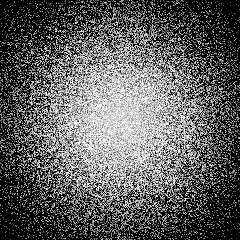

shape = (240, 240), type = float64, min = 0.0, max = 0.9999875713633899


In [24]:
# Tester les différentes versions en enlevant successivement le '#' devant les lignes de type : #img = ...

# Appliquer des transformations géométriques aux coordonnées des pixels avant de générer le dégradé
# (linéaire, circulaire, elliptique) permet d'enrichir énormément les formes possibles

# Par exemple, on peut utiliser des transformations géométriques aléatoires :
dx, dy = np.random.random((2,240,240)) - 0.5 # on génère un bruit uniforme 2D à valeurs dans [-0.5,0.5]
#dx, dy = np.random.normal(0, 0.5, (2,240,240)) # on génère un bruit gaussien 2D d'écart-type 0.5
#dx, dy = np.random.normal(0, 0.1, (2,240,240)) # on génère un bruit gaussien 2D d'écart-type 0.1
xx, yy = x + dx, y + dy # on utilise les valeurs aléatoires pour déplacer les positions des pixels
img = ball(xx, yy, 0.4) # on génère le dégradé circulaire sur les pixels déplacés aléatoirement

# Ou des transformations géométriques définies par une équation en coordonnées polaires
theta = np.arctan2(y,x); delta = 2 / (3 + np.cos(5*theta-1.5))
xx, yy = x/delta, y/delta # on applique une transformation multiplicative sur les coordonnées
#img = ball(xx, yy, 0.6) # on obtient un dégradé en forme d'étoile à 5 branches

theta = np.arctan2(y,x); delta = 0.6 + 0.3*np.cos(12*theta)
xx, yy = x/delta, y/delta # on applique une transformation multiplicative sur les coordonnées
#img = ball(xx, yy, 0.4) # on obtient un dégradé en forme de marguerite

z = y - 0.75; theta = np.arctan2(z,x); t = np.abs(np.tan(theta))
delta = 1.2*t ** (1 / (0.05+1.7*t)) ; xx, yy = x/delta, np.where(z > 0, 1, z/delta)
#img = colors[0] * (ball(xx, yy, 0.2) * ramp.T[::-1,:] ** 0.8)[:,:,None] # en forme de coeur

# Une autre variante très classique des dégradés circulaires se base sur les 'superquadriques'
# f(x,y) = ((x^2)^a + (y^2)^b)) ^ c où les valeurs (a,b,c) permettent d'obtenir des formes très variées
squad = lambda x,y,a,b,c: 1 - np.clip((x*x)**a + (y*y)**b, 0, 1) ** c

#img = squad(x, y, 1, 4, 0.8) # un cylindre aux formes arrondies
#img = tube(squad(x, y, 1.5, 0.2, 5), 0.2) # une pseudo-bouche
#img = squad(4*(x+y) % 2 - 1, 2*(x-y) % 2 - 1, 4, 1, 0.5) # une série de rondelles

# Pour obtenir la dernière image de la colonne 4 (galets colorés), on va procéder en 2 étapes :

# Pour la couleur des galets, on crée une fonction d'index qui va définir une grille de couleurs
grid = (4*(x+y)//2 + 8*(4*(x-y)//2)) % 6 # la grille est orientée sur les axes x+y et x-y
colorgrid = colors[grid.astype(int)] # cela donne des cases tournées de 45°
#img = colorgrid

# Pour les formes des galets, on définit une transformation géométrique qui va déformer cette grille
xx, yy = 4*(x+y) % 2 - 1, 4*(x-y) % 2 - 1 # on crée la même grille sur les axes x+y et x-y
dx, dy = np.cos(11*y), np.sin(5*x) # on définit 2 trains d'ondes sinusoïdales en x et en Y
pebbles = ball(xx + 0.2*dx, yy + 0.2*dy, 0.2) # on déforme la grille avec les 2 trains d'onde
#img = pebbles

# Enfin, Il n'y a plus qu'à fusionner les deux étapes :
#img = colorgrid * pebbles[:,:,None]

view(img); print(f"shape = {img.shape}, type = {img.dtype}, min = {img.min()}, max = {img.max()}")

<h2 style="padding:0 0 8px; margin:0 -20px; color:#FFF; background:#07D; text-align:right">● ● ●</h3>